<a href="https://colab.research.google.com/github/GurionRamapoguSajeevan/credit-risk-modeling-ML-pipeline/blob/main/01_data_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# cloning repo from Git
!git clone https://github.com/GurionRamapoguSajeevan/credit-risk-modeling-ML-pipeline.git

%cd credit-risk-modeling-ML-pipeline

# Listing files to confirm
!ls

Cloning into 'credit-risk-modeling-ML-pipeline'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 14 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 7.70 KiB | 7.70 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/credit-risk-modeling-ML-pipeline
01_data_eda.ipynb  LICENSE  README.md  requirements.txt


# installing the required dependencies

In [2]:
# Install from requirements (run this)
!pip install -r requirements.txt

# Extra for Colab (if needed)
!pip install --upgrade pandas shap plotly duckdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 123.8 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.0
    Uninstalling cachetools-7.0.0:
      Successfully uninstalled cachetools-7.0.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 120.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.4/20.4 MB 90.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
  Attempting uninstall: duckdb
    Found existing installation: duckdb 1.3.2
    Uninstalling duckdb-1.3.2:
      Successfully uninstalled duckdb-1.3.2
  Attempting uninstall: pandas
    Found existing ins

### Loading the data and basic checks

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb  # For SQL-like queries

# Load data
df = pd.read_csv('/credit_risk_dataset.csv')
print(f"Shape: {df.shape}")
print("\nColumns:")
print(df.columns.tolist())
print("\nSample:")
display(df.head())

# Quick info
df.info()

Shape: (32581, 12)

Columns:
['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']

Sample:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<class 'pandas.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  str    
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  str    
 5   loan_grade                  32581 non-null  str    
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  str    
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), str(4)
memory usage: 3.5 MB


## Essential Data quality checks

In [5]:
# Missing values
print("Missing Values:")
print(df.isnull().sum())

# Duplicates
print(f"\nDuplicates: {df.duplicated().sum()}")

# Basic stats
display(df.describe())

# Target distribution (imbalance!)
print("\nTarget (loan_status) Distribution:")
print(df['loan_status'].value_counts(normalize=True) * 100)

# SQL Query trial
query = """
SELECT
    loan_status,
    COUNT(*) as count,
    AVG(person_income) as avg_income,
    AVG(loan_amnt) as avg_loan
FROM df
GROUP BY loan_status
"""
print("\nSQL-like Summary:")
display(duckdb.query(query).df())

Missing Values:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Duplicates: 165


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000



Target (loan_status) Distribution:
loan_status
0    78.183604
1    21.816396
Name: proportion, dtype: float64

SQL-like Summary:


,loan_status,count,avg_income,avg_loan
0,0,25473,70804.361559,9237.464178
1,1,7108,49125.652223,10850.502954


## EDA Visuals (Distributions & Correlations)

<Figure size 1500x1000 with 0 Axes>

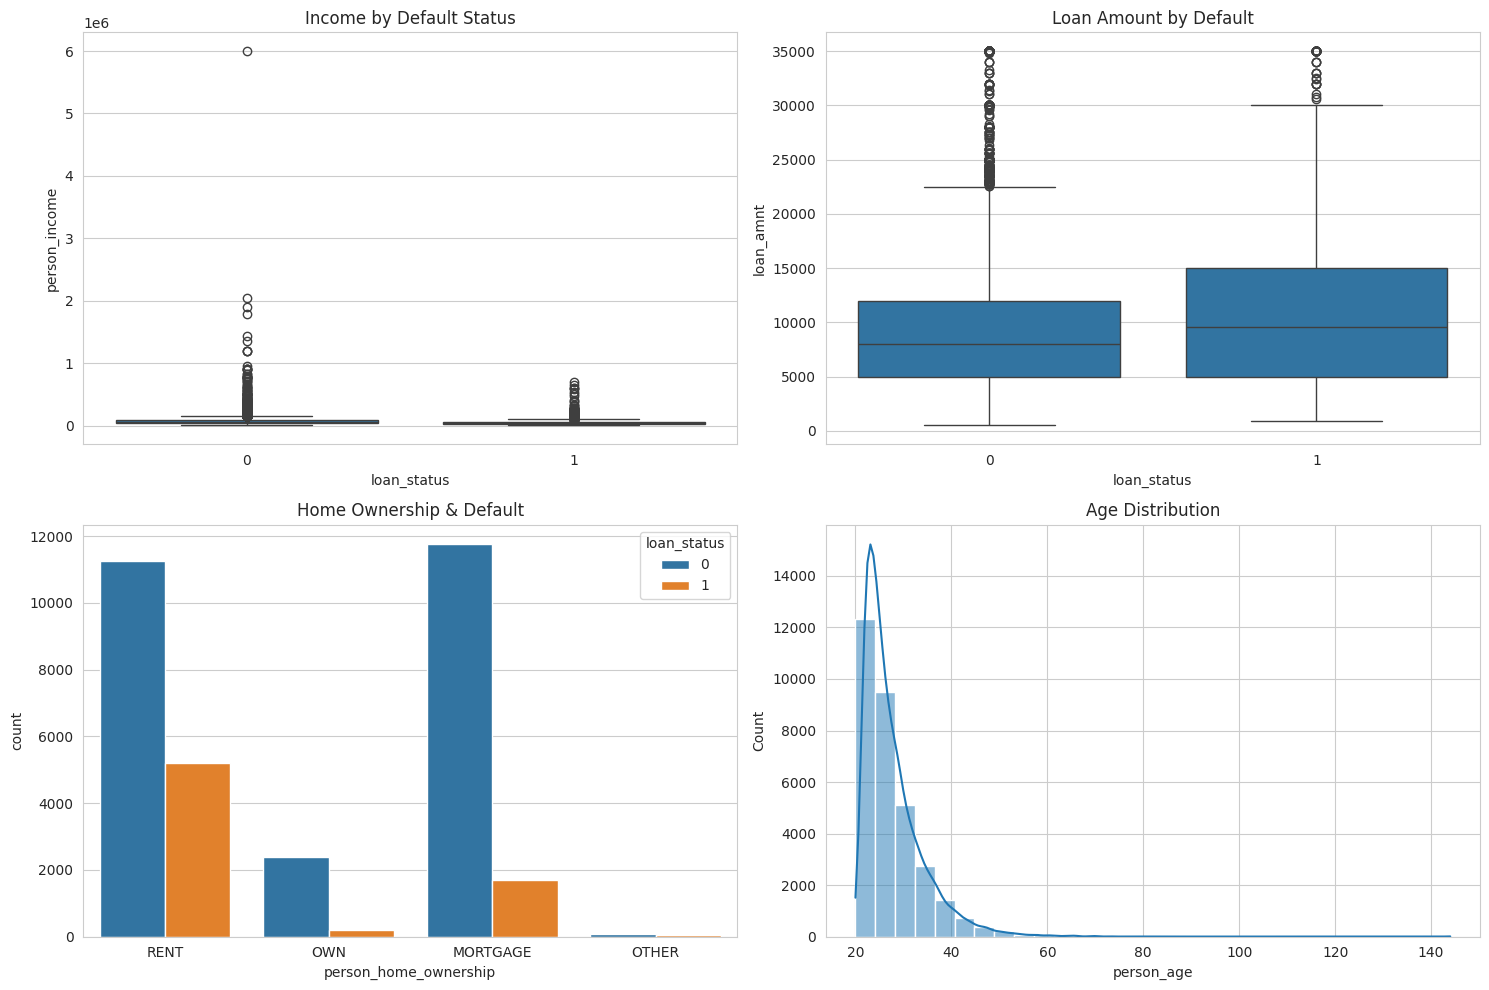

In [7]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# 1. Target by Key Features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(x='loan_status', y='person_income', data=df, ax=axes[0,0])
axes[0,0].set_title('Income by Default Status')

sns.boxplot(x='loan_status', y='loan_amnt', data=df, ax=axes[0,1])
axes[0,1].set_title('Loan Amount by Default')

sns.countplot(x='person_home_ownership', hue='loan_status', data=df, ax=axes[1,0])
axes[1,0].set_title('Home Ownership & Default')

sns.histplot(df['person_age'], bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_title('Age Distribution')

plt.tight_layout()
plt.show()


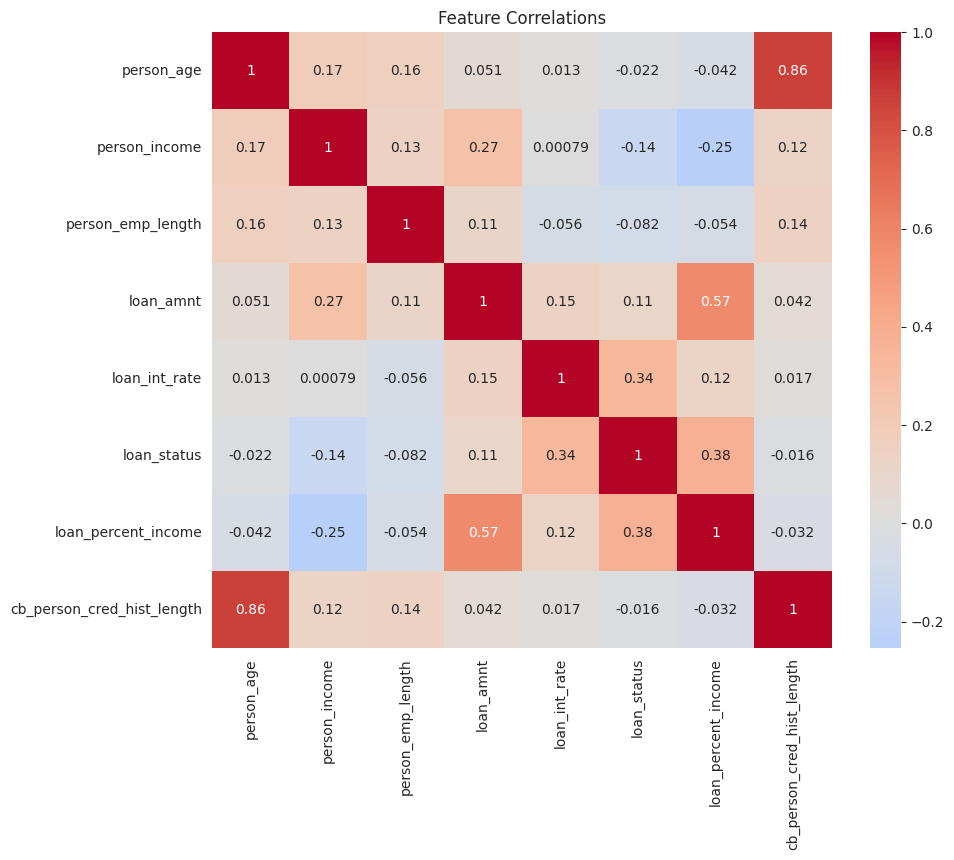

In [8]:
# 2. Correlation Heatmap (numerics)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations')
plt.show()

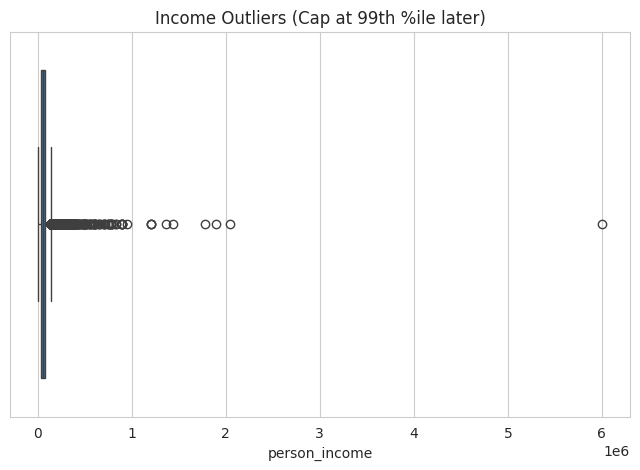

In [9]:
# 3. Outlier Check (Income)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['person_income'])
plt.title('Income Outliers (Cap at 99th %ile later)')
plt.show()

## Default rates by Key Categories

/tmp/ipython-input-2141193881.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, ax=axes[i], palette='viridis')
/tmp/ipython-input-2141193881.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, ax=axes[i], palette='viridis')
/tmp/ipython-input-2141193881.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, ax=axes[i], palette='viridis')


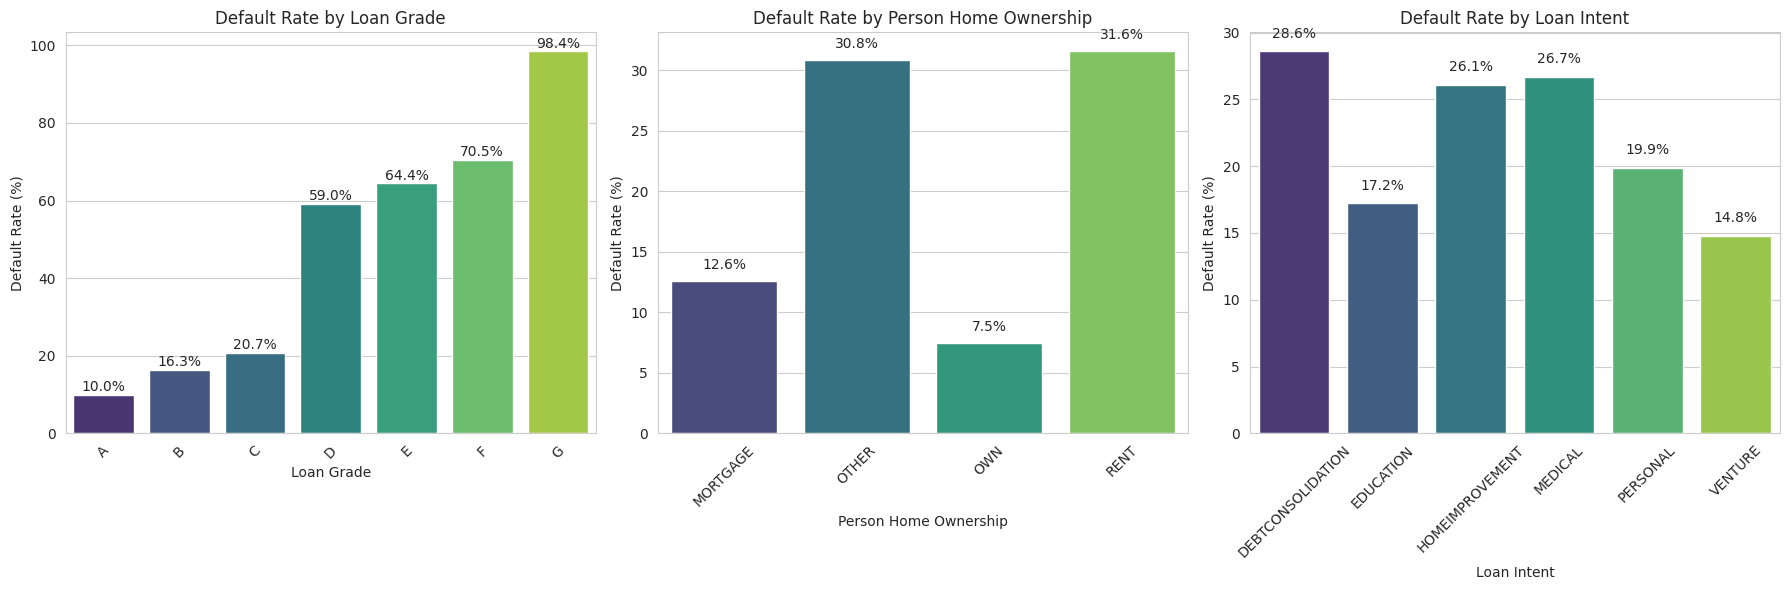

Key Insight: Grade D+ loans have 2-3x default risk—flag for lending decisions.


In [10]:
#4 Default rates by categorical features
cat_features = ['loan_grade', 'person_home_ownership', 'loan_intent']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, col in enumerate(cat_features):
    # Pivot for % default
    default_rates = df.groupby(col)['loan_status'].mean() * 100
    sns.barplot(x=default_rates.index, y=default_rates.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Default Rate by {col.replace("_", " ").title()}')
    axes[i].set_ylabel('Default Rate (%)')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].tick_params(axis='x', rotation=45)
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.1f}%', (p.get_x() + 0.4, p.get_height() + 1), ha='center')

plt.tight_layout()
plt.show()

# Insight print
print("Key Insight: Grade D+ loans have 2-3x default risk—flag for lending decisions.")

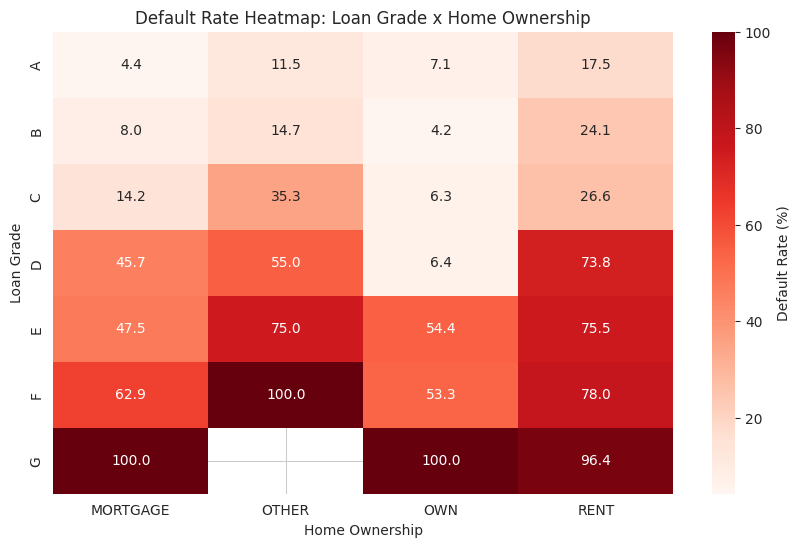


Top Risk Combos (SQL Query):


,loan_grade,person_home_ownership,default_rate,count
0,G,MORTGAGE,100.000000,31
1,G,OWN,100.000000,5
2,F,OTHER,100.000000,2
3,G,RENT,96.428571,28
4,F,RENT,77.952756,127
5,E,RENT,75.535714,560
6,E,OTHER,75.000000,8
7,D,RENT,73.781354,2113
8,F,MORTGAGE,62.886598,97
9,D,OTHER,55.000000,20


In [12]:
# Crosstab: Default rate by Grade x Home Ownership
pivot = pd.pivot_table(
    df,
    values='loan_status',
    index='loan_grade',
    columns='person_home_ownership',
    aggfunc='mean'
) * 100

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='Reds', cbar_kws={'label': 'Default Rate (%)'})
plt.title('Default Rate Heatmap: Loan Grade x Home Ownership')
plt.ylabel('Loan Grade')
plt.xlabel('Home Ownership')
plt.show()

# SQL-like for big data feel
query = """
SELECT
    loan_grade,
    person_home_ownership,
    AVG(loan_status) * 100 as default_rate,
    COUNT(*) as count
FROM df
GROUP BY loan_grade, person_home_ownership
ORDER BY default_rate DESC
LIMIT 10
"""
print("\nTop Risk Combos (SQL Query):")
display(duckdb.query(query).df())

## Data Cleaning & Feature Engineering

In [13]:
# 1. Handle Missings (proactive quality)
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

# 2. Cap Outliers (e.g., age >100, income >99th)
df['person_age'] = df['person_age'].clip(upper=df['person_age'].quantile(0.99))
df['person_income'] = df['person_income'].clip(upper=df['person_income'].quantile(0.99))

# 3. New Features (business-relevant)
df['dti_ratio'] = df['loan_amnt'] / df['person_income']  # Debt-to-Income
df['loan_to_income'] = df['loan_amnt'] / df['person_income']
df['emp_to_age'] = df['person_emp_length'] / df['person_age']  # Stability proxy

# 4. Encode Categoricals (one-hot for now)
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Cleaned Shape:", df.shape)
display(df.head(3))

Cleaned Shape: (32581, 26)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,dti_ratio,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000.0,123.0,35000,16.02,1,0.59,Y,3,0.593220,...,False,False,True,False,False,False,True,False,False,False
1,21,9600.0,5.0,1000,11.14,0,0.10,N,2,0.104167,...,False,False,False,False,True,False,False,False,False,False
2,25,9600.0,1.0,5500,12.87,1,0.57,N,3,0.572917,...,False,True,False,False,False,True,False,False,False,False


## saving EDA checkpoint

In [14]:
import os

# 1. Save cleaned data (from your df after Cell 7)
df.to_csv('credit_risk_cleaned.csv', index=False)
print("✅ Cleaned data saved as credit_risk_cleaned.csv")

✅ Cleaned data saved as credit_risk_cleaned.csv


In [15]:

# 2. Copy notebook to repo root
#!cp /content/01_data_eda.ipynb 01_data_eda.ipynb
#print("✅ Notebook saved as 01_data_eda.ipynb")

cp: cannot stat '/content/01_data_eda.ipynb': No such file or directory
✅ Notebook saved as 01_data_eda.ipynb


In [16]:
# 3. Git Commit & Push
#!git add 01_data_eda.ipynb credit_risk_cleaned.csv
#!git config --global user.email "gurion7007@gmail.com"
#!git config --global user.name "GurionRamapoguSajeevan"
#!git commit -m "checkpoint: 01_data_eda complete - cleaning, features, EDA"
#!git push origin main

#print("EDA checkpoint saved! Check GitHub repo.")

[main 55bf9b0] checkpoint: 01_data_eda complete - cleaning, features, EDA
 1 file changed, 32582 insertions(+)
 create mode 100644 credit_risk_cleaned.csv
fatal: could not read Username for 'https://github.com': No such device or address
EDA checkpoint saved! Check GitHub repo.
